In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [2]:
class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.priors_ = np.bincount(y) / len(y)
        self.n_classes_ = np.max(y) + 1
        
        self.means_ = np.array([X[np.where(y==i)].mean(axis=0) for i in range(self.n_classes_)])
        self.stds_ = np.array([X[np.where(y==i)].std(axis=0) for i in range(self.n_classes_)])
        
        
        return self
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for i in range(len(X)):
            probas = []
            for j in range(self.n_classes_):
                probas.append((1/np.sqrt(2*np.pi*self.stds_[j]**2)*np.exp(-0.5*((X[i]-self.means_[j])/self.stds_[j])**2)).prod()*self.priors_[j])
            probas = np.array(probas)
            res.append(probas / probas.sum())
            
        
        return np.array(res)
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)
   
    
        
    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


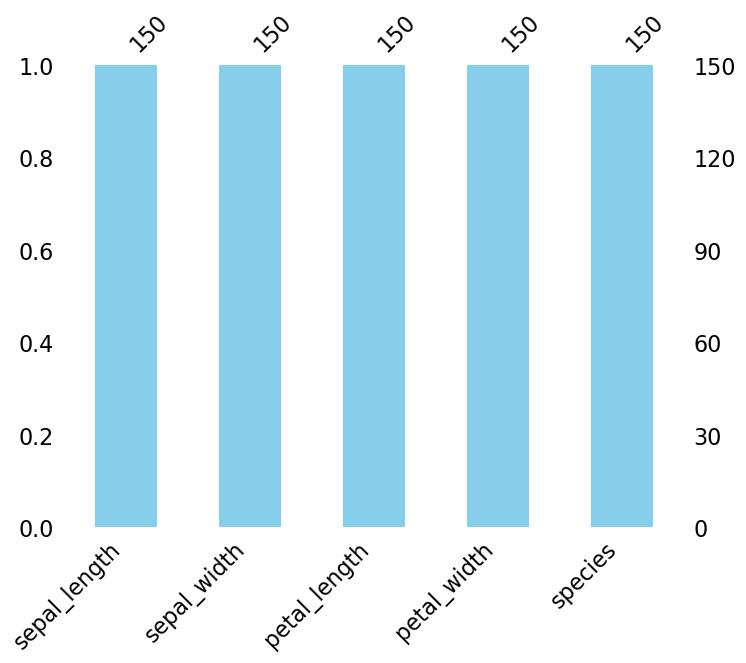

In [6]:
import missingno as msno
msno.bar(df,figsize=(8,6),color='skyblue')
plt.show()

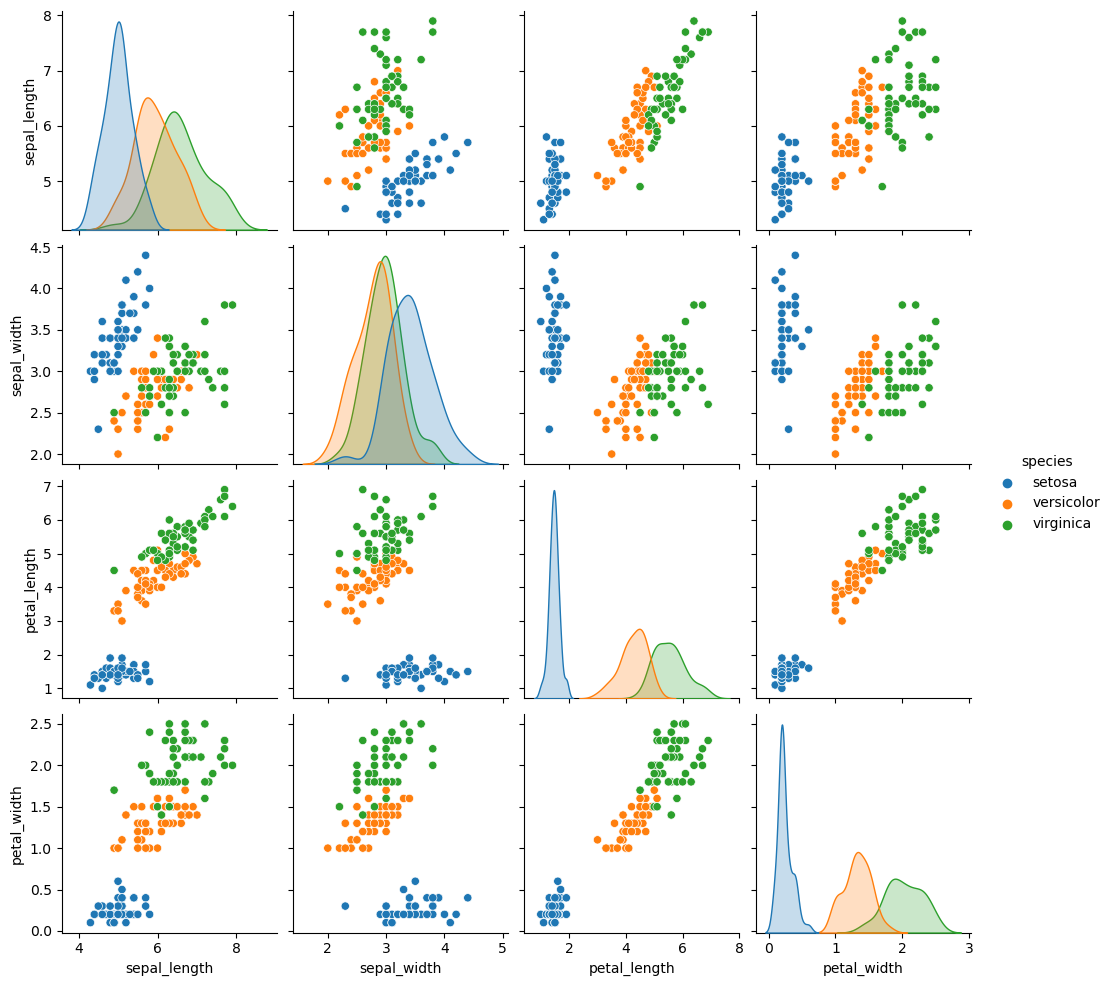

In [7]:
sns.pairplot(df,hue="species")
plt.show()

<AxesSubplot:>

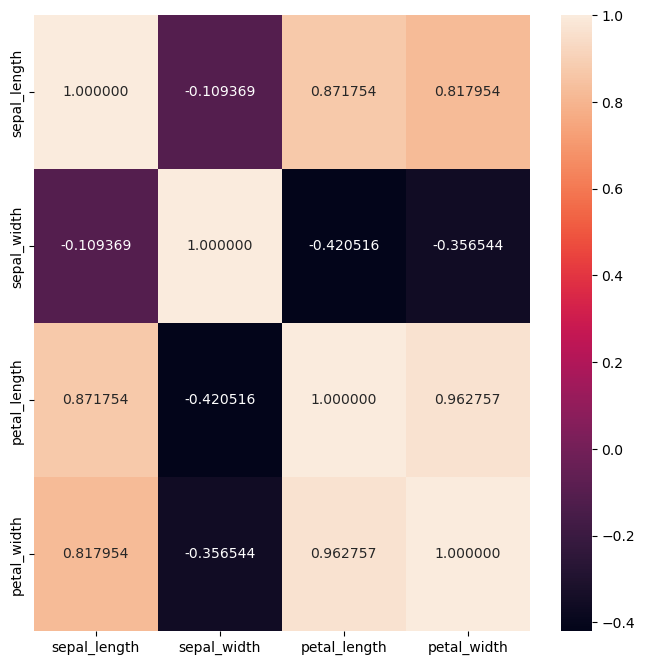

In [8]:
plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,fmt="f")

In [9]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [13]:
gaussian = GaussianNaiveBayes()
gaussian.fit(X_train, y_train)

GaussianNaiveBayes()

In [14]:
Y_pred = gaussian.predict(X_test) 

In [15]:
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)

print('Confusion matrix \n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)


Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy_Naive Bayes: 0.967
